In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
from scipy.stats import zscore


In [6]:
df1 = pd.read_csv('../data/benin-malanville.csv')

df3 = pd.read_csv('../data/togo-dapaong_qc.csv')

In [7]:
df1.head()

df3.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [8]:
print("Benin Dataset Shape:")
print(df1.shape)



print("Togo Dataset Shape:")
print(df3.shape)

Benin Dataset Shape:
(525600, 19)
Sierra Leone Dataset Shape:
(525600, 19)
Togo Dataset Shape:
(525600, 19)


In [9]:
#select numeric columns
numeric_cols = df1.select_dtypes(include=[np.number])

In [10]:
#calculate summary statistics for each numeric column 
summary_stats = numeric_cols.describe()
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [13]:
df1.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [12]:
df1['WD'].unique()

array([122.1,   0. , 124.6, ...,  40.3,   5.6,  35.9])

In [14]:
df1['ModA'].unique()

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.182e+03, 1.163e+03,
       1.191e+03])

In [15]:
df1['ModB'].unique()

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.189e+03, 1.153e+03,
       1.161e+03])

In [16]:
df1['Cleaning'].unique()

array([0, 1])

In [17]:
df1['Precipitation'].unique()

array([0. , 0.1, 0.8, 0.7, 0.6, 0.2, 0.5, 0.4, 0.3, 1.2, 1.7, 0.9, 1.3,
       1.4, 1.8, 1.5, 1.6, 1. , 1.1, 2. , 2.4, 2.3, 2.1, 2.2, 1.9, 2.5])

In [19]:
#Clean the data check if their are null values in the data
df1.isnull()
df1.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [18]:
#count the number of duplicates in each column
df1.duplicated().sum()

np.int64(0)

In [19]:
df1 = df1.drop('Comments', axis=1)

In [20]:
print(df1.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')


In [22]:
# Check for negative values
negative_values = df1[(df1['GHI'] < 0) | (df1['DNI'] < 0) | (df1['DHI'] < 0)]
print(negative_values)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDstdev   BP  C

In [23]:
#removes rows with negative values in 
df1 = df1[(df1['GHI'] >= 0) & (df1['DNI'] >= 0) & (df1['DHI'] >= 0)]

In [24]:
# Convert the 'Timestamp' column to datetime format
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

In [25]:
# Set the 'Timestamp' column as the index
df1.set_index('Timestamp', inplace=True)

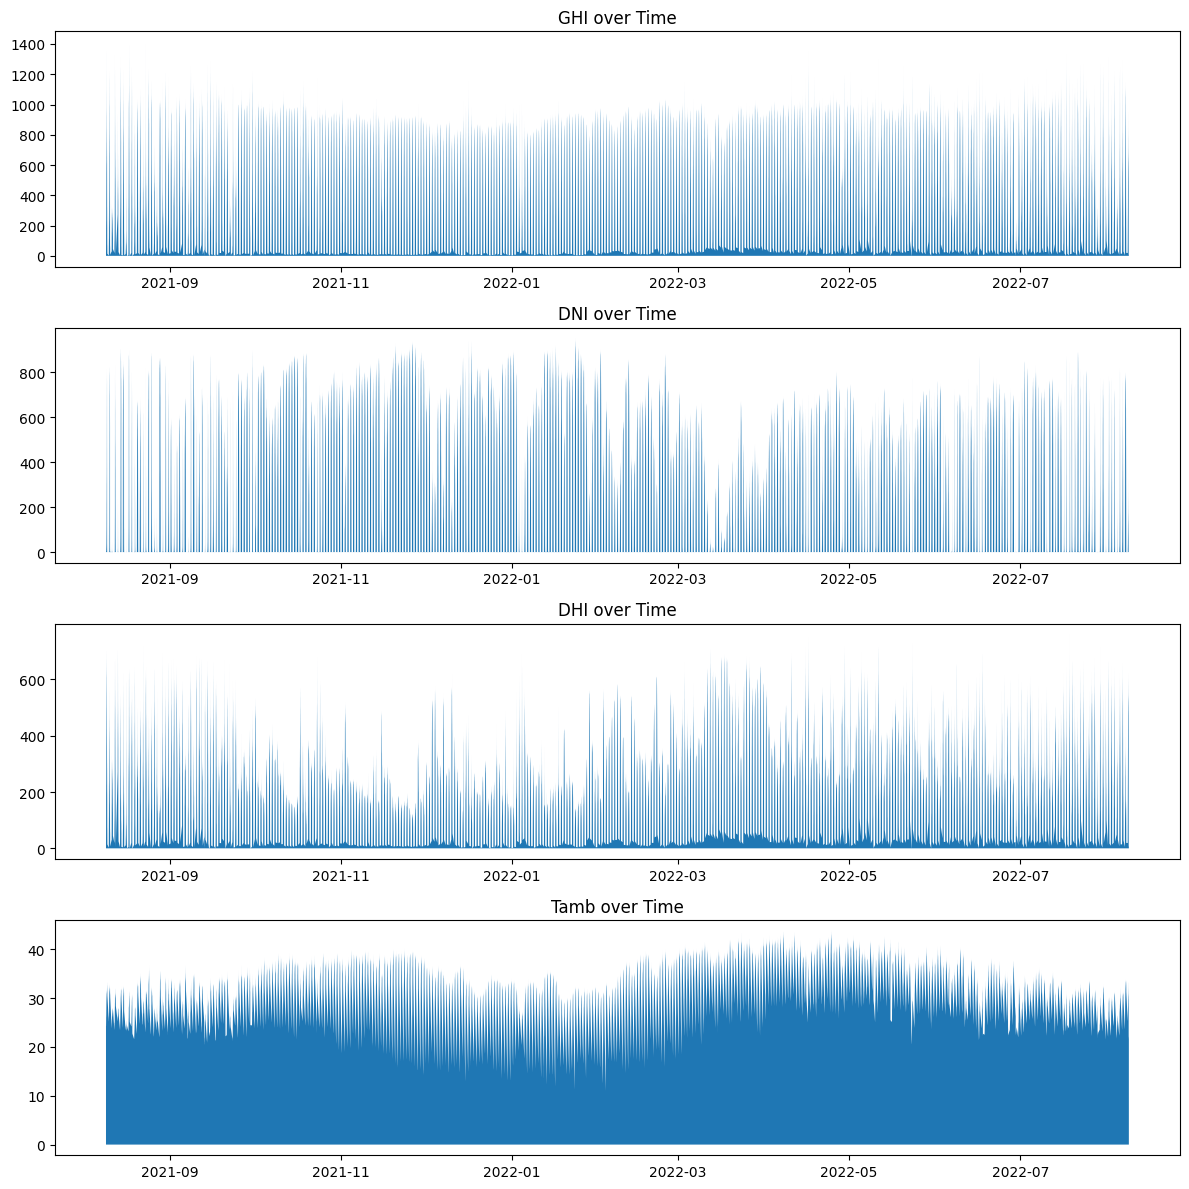

In [29]:
# Plot area plots of GHI, DNI, DHI, and Tamb over time
fig, ax = plt.subplots(4, 1, figsize=(12, 12))
ax[0].fill_between(df1.index, df1['GHI'])
ax[0].set_title('GHI over Time')
ax[1].fill_between(df1.index, df1['DNI'])
ax[1].set_title('DNI over Time')
ax[2].fill_between(df1.index, df1['DHI'])
ax[2].set_title('DHI over Time')
ax[3].fill_between(df1.index, df1['Tamb'])
ax[3].set_title('Tamb over Time')
plt.tight_layout()
plt.show()

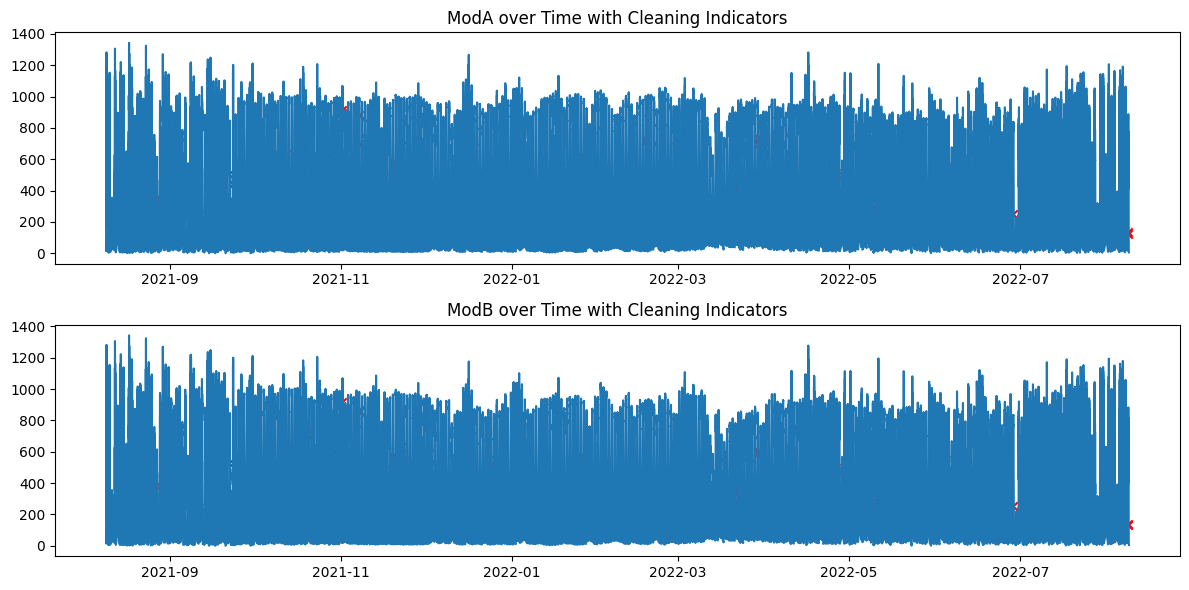

In [32]:
# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Plot ModA with cleaning indicators
ax[0].plot(df1['ModA'])
ax[0].scatter(df1.index[df1['Cleaning'] == 1], df1['ModA'][df1['Cleaning'] == 1], c='red', marker='x')
ax[0].set_title('ModA over Time with Cleaning Indicators')

# Plot ModB with cleaning indicators
ax[1].plot(df1['ModB'])
ax[1].scatter(df1.index[df1['Cleaning'] == 1], df1['ModB'][df1['Cleaning'] == 1], c='red', marker='x')
ax[1].set_title('ModB over Time with Cleaning Indicators')

plt.tight_layout()
plt.show()

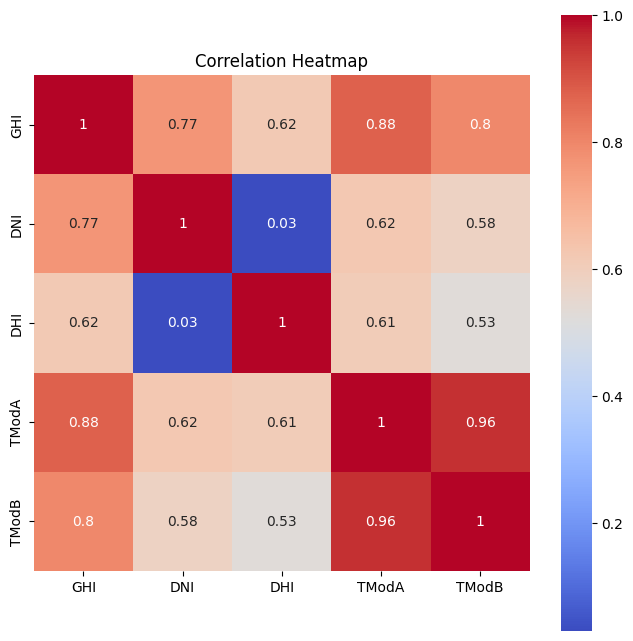

In [33]:
#correlation heatmap
# Select the relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Calculate the correlation matrix
corr_matrix = df1[corr_cols].corr()

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

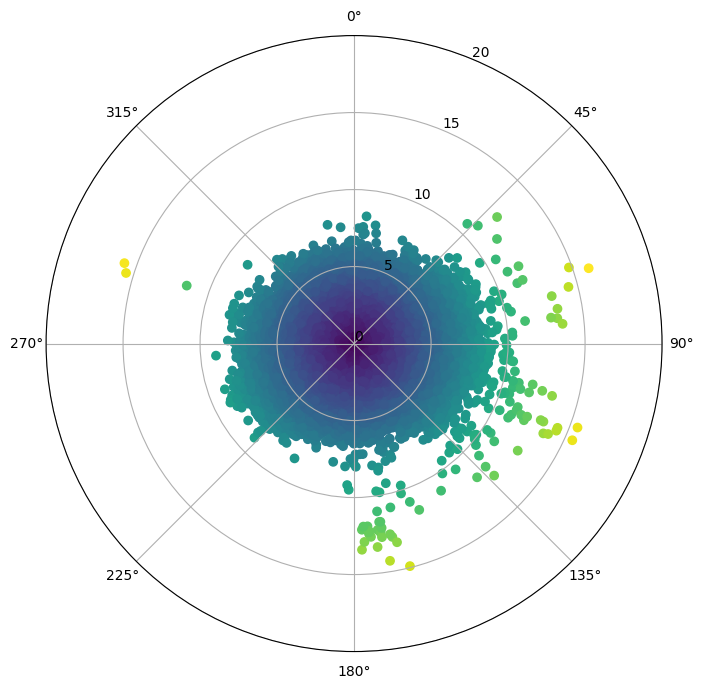

In [34]:
# Convert wind direction to radians
wd_rad = np.deg2rad(df1['WD'])

# Create a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.scatter(wd_rad, df1['WS'], c=df1['WS'], cmap='viridis')
ax.set_rticks([0, 5, 10, 15, 20])  # Customize the radial ticks
ax.set_theta_zero_location('N')  # Set the zero direction to North
ax.set_theta_direction(-1)  # Set the direction to clockwise
plt.show()

e:\10 Academy\solar-radiation-measurement\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


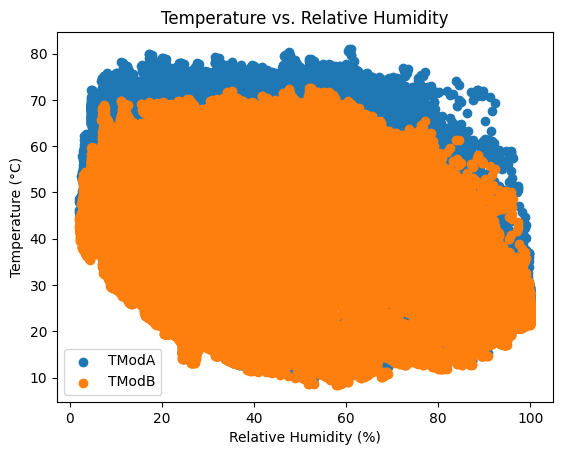

In [36]:
#Temperature analysis
# Create a scatter plot
plt.scatter(df1['RH'], df1['TModA'], label='TModA')
plt.scatter(df1['RH'], df1['TModB'], label='TModB')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs. Relative Humidity')
plt.legend()
plt.show()


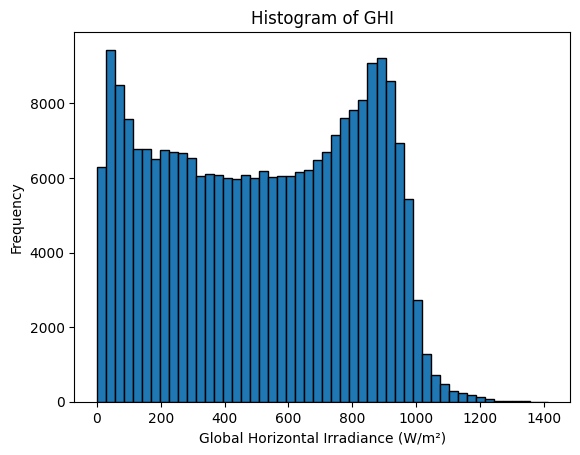

In [37]:
# Create a histogram of GHI
plt.hist(df1['GHI'], bins=50, edgecolor='black')
plt.xlabel('Global Horizontal Irradiance (W/m²)')
plt.ylabel('Frequency')
plt.title('Histogram of GHI')
plt.show()

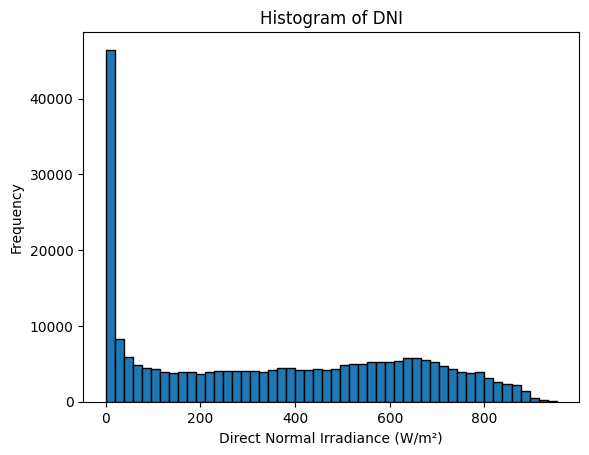

In [39]:
# Create a histogram of DNI
plt.hist(df1['DNI'], bins=50, edgecolor='black')
plt.xlabel('Direct Normal Irradiance (W/m²)')
plt.ylabel('Frequency')
plt.title('Histogram of DNI')
plt.show()

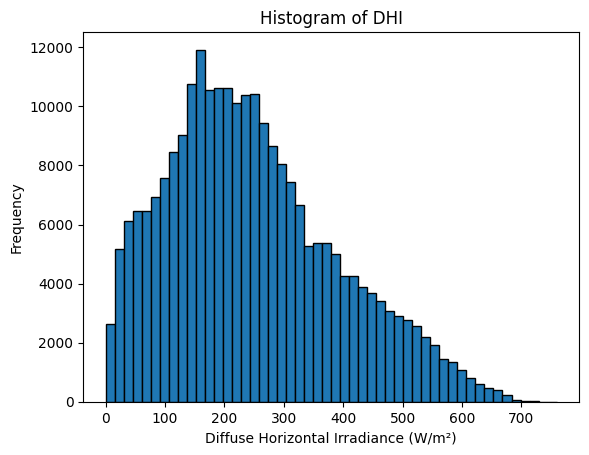

In [40]:
# Create a histogram DHI
plt.hist(df1['DHI'], bins=50, edgecolor='black')
plt.xlabel('Diffuse Horizontal Irradiance (W/m²)')
plt.ylabel('Frequency')
plt.title('Histogram of DHI')
plt.show()

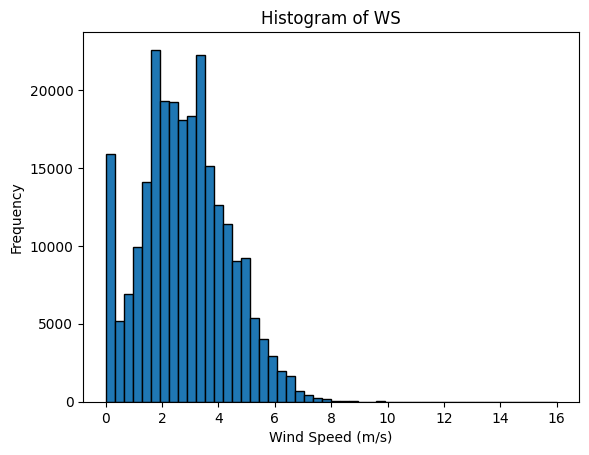

In [41]:
# WS histogram
plt.hist(df1['WS'], bins=50, edgecolor='black')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Histogram of WS')
plt.show()

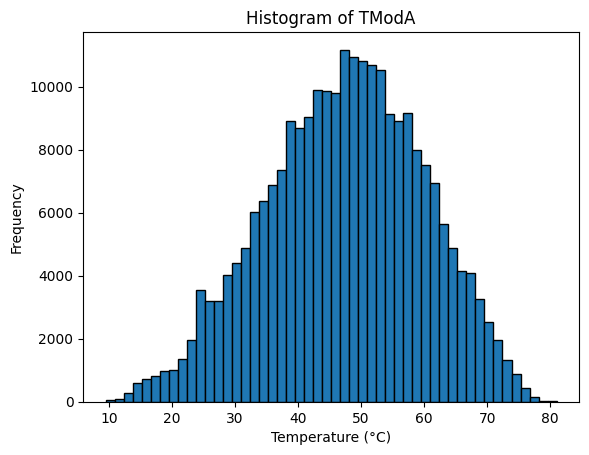

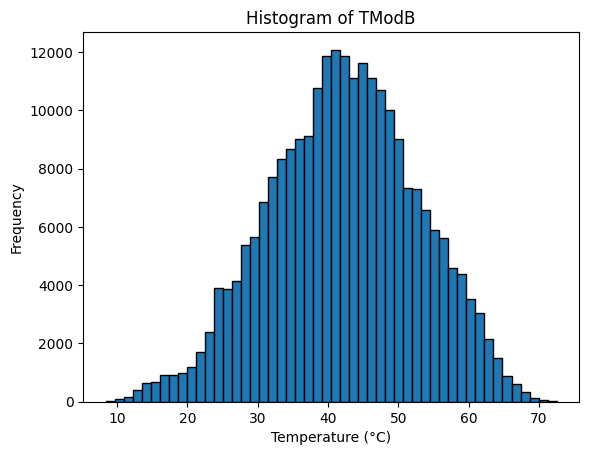

In [50]:
# Create a histogram for TModA
plt.hist(df1['TModA'], bins=50, edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of TModA')
plt.show()

# Create a histogram for TModB
plt.hist(df1['TModB'], bins=50, edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of TModB')
plt.show()

In [43]:
# Calculate Z-scores
df1['GHI_Z'] = (df1['GHI'] - df1['GHI'].mean()) / df1['GHI'].std()
df1['DNI_Z'] = (df1['DNI'] - df1['DNI'].mean()) / df1['DNI'].std()
df1['DHI_Z'] = (df1['DHI'] - df1['DHI'].mean()) / df1['DHI'].std()
df1['WS_Z'] = (df1['WS'] - df1['WS'].mean()) / df1['WS'].std()
df1['TModA_Z'] = (df1['TModA'] - df1['TModA'].mean()) / df1['TModA'].std()
df1['TModB_Z'] = (df1['TModB'] - df1['TModB'].mean()) / df1['TModB'].std()

In [45]:
# Flag outliers
df1['GHI_Outlier'] = np.where(np.abs(df1['GHI_Z']) > 2, 1, 0)
df1['DNI_Outlier'] = np.where(np.abs(df1['DNI_Z']) > 2, 1, 0)
df1['DHI_Outlier'] = np.where(np.abs(df1['DHI_Z']) > 2, 1, 0)
df1['WS_Outlier'] = np.where(np.abs(df1['WS_Z']) > 2, 1, 0)
df1['TModA_Outlier'] = np.where(np.abs(df1['TModA_Z']) > 2, 1, 0)
df1['TModB_Outlier'] = np.where(np.abs(df1['TModB_Z']) > 2, 1, 0)

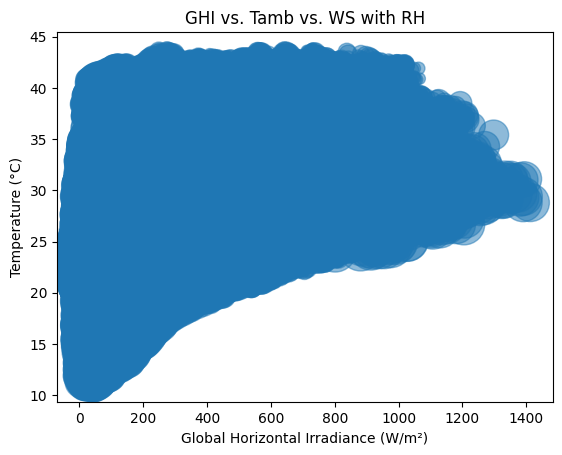

In [49]:
# Create a bubble chart: GHI vs. Tamb vs. WS with bubble size representing RH
plt.scatter(df1['GHI'], df1['Tamb'], s=df1['RH']*10, alpha=0.5)
plt.xlabel('Global Horizontal Irradiance (W/m²)')
plt.ylabel('Temperature (°C)')
plt.title('GHI vs. Tamb vs. WS with RH')
plt.show()